In [203]:
# stuff I always import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [204]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [205]:
#Rename columns for ease of pandas
df['math_score'] = df['math score']
df['reading_score'] = df['reading score']
df['writing_score'] = df['writing score']
df = df.drop(['math score', 'reading score', 'writing score'], axis=1)
#Add exam average columns
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


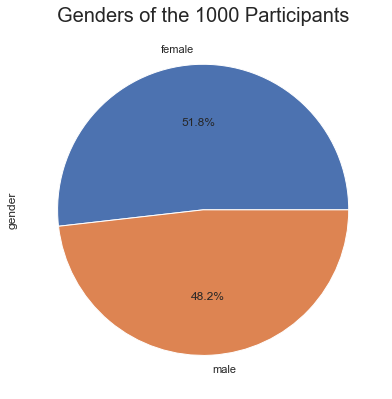

In [258]:
#Lets see how many men/women we have
plt.figure(figsize=(30,20))
plt.subplot(142)
plt.title('Genders of the 1000 Participants',fontsize = 20)
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.savefig('PercentGender.png')

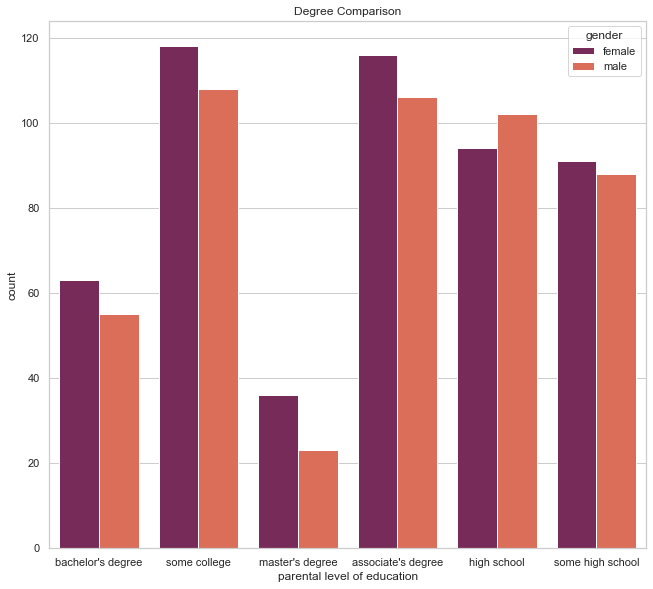

In [259]:
sns.set_style('whitegrid')
sns.countplot(x = 'parental level of education', data = df, hue='gender', palette = 'rocket')
plt.title('Degree Comparison')
plt.savefig('GenderDegree.png')
##As we can see, females take up more of each degree aside from high school

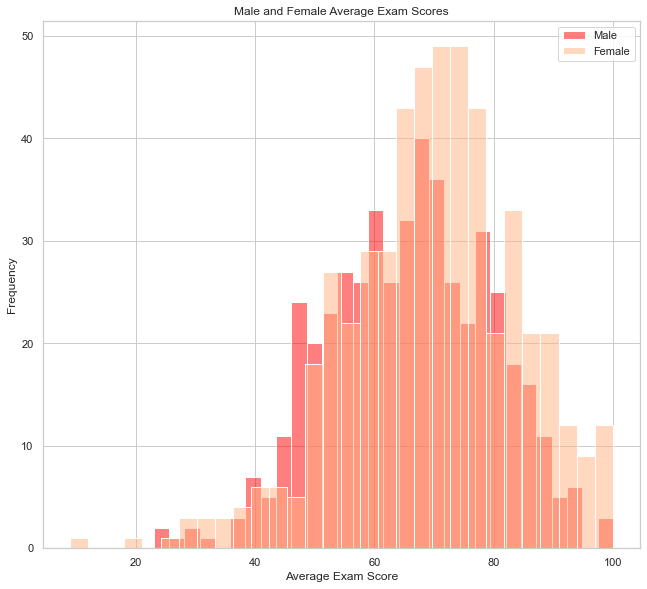

<Figure size 770.4x698.4 with 0 Axes>

In [260]:
#Histogram of average scores from both genders
m = plt.hist(df[df["gender"] == "male"].average_score,bins=30,fc = (1,0,0,0.5),label = "Male")
f = plt.hist(df[df["gender"] == "female"].average_score,bins=30,fc = (1,0.7,0.5,0.5),label = "Female")
plt.legend()
plt.xlabel("Average Exam Score")
plt.ylabel("Frequency")
plt.title("Male and Female Average Exam Scores")
plt.show()
plt.savefig('GenderDis.png')

In [261]:
#Average of each exam.
math_mean = df['math_score'].mean()
reading_mean = df['reading_score'].mean()
writing_mean = df['writing_score'].mean()

#Standard deviation of each exam
sd_math = df['math_score'].std()
sd_reading = df['reading_score'].std()
sd_writing = df['writing_score'].std()

print('Average math score:',math_mean)
print('Average reading score:',reading_mean)
print('Average writing score:',writing_mean)
print('Writing score standard deviation:',sd_writing)
print('Reading score standard deviation:',sd_reading)
print('Math score standard deviation:',sd_math)

Average math score: 66.089
Average reading score: 69.169
Average writing score: 68.054
Writing score standard deviation: 15.195657010869642
Reading score standard deviation: 14.60019193725222
Math score standard deviation: 15.163080096009468


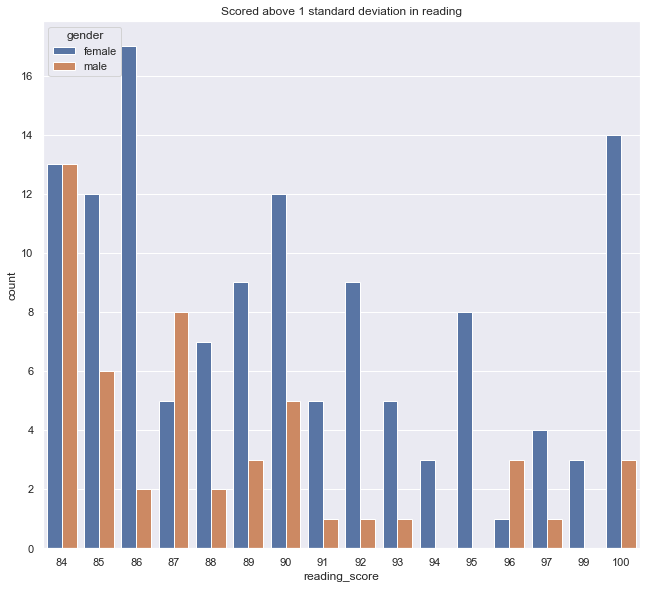

In [238]:
smart_reading = df[df['reading_score']  > reading_mean + (sd_reading)] #People who scored above one standard deviation

sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10.7,9.7)})
sns.countplot(x = 'reading_score', data = smart_reading, hue='gender')
plt.title('Scored above 1 standard deviation in reading')
plt.savefig('smart reading.png')

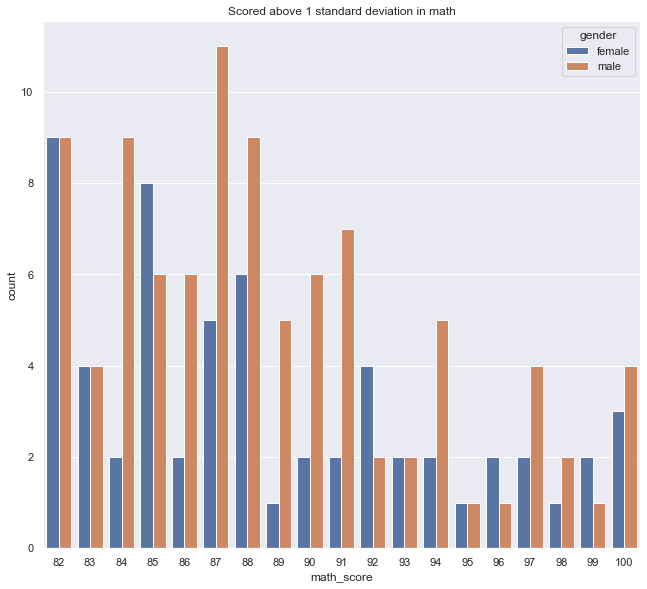

In [237]:
smart_math = df[df['math_score']  > math_mean + (sd_math)] #People who scored above one standard deviation

sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10.7,9.7)})
sns.countplot(x = 'math_score', data = smart_math, hue='gender')
plt.title('Scored above 1 standard deviation in math')
plt.savefig('smart math.png')

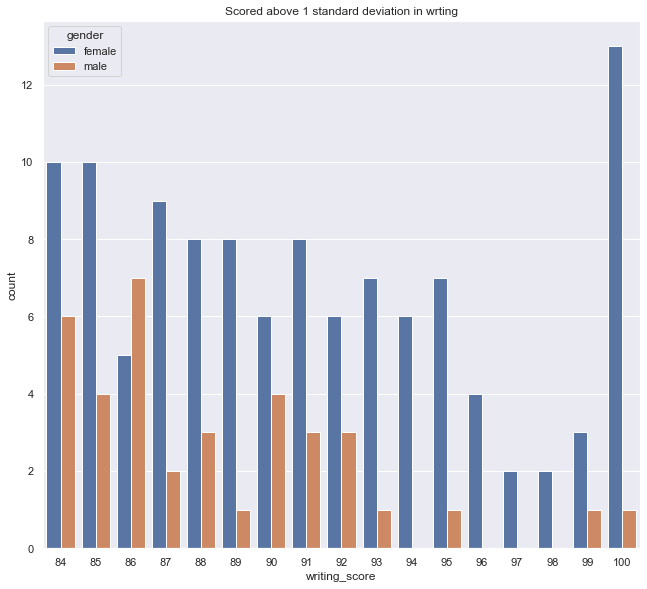

In [235]:
smart_writing = df[df['writing_score']  > writing_mean + (sd_writing)] #People who scored above one standard deviation

sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10.7,9.7)})
sns.countplot(x = 'writing_score', data = smart_writing, hue='gender')
plt.title('Scored above 1 standard deviation in wrting')
plt.savefig('smart writing.png')